In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning & Processing
Clean and process the extracted data. Remove any irrelevant or unnecessary information. Organize the data in a manner suitable for analysis.

In [2]:
df= pd.read_csv("PRs PokemonGo-Bot.csv")
df.head()

,Unnamed: 0,ID,Created,Closed,Time To Close (hours),Number of Changed Files,Title,Labels,Labels#,Is Merged,Time to Merge (hours),Base,Descriptions,Open/Closed,Author Name,Updated at,Commits
0,0,6314,2022-09-24 14:40:20,2023-01-30 11:02:27,3068.368611,1,Snyk fixes,[],0,False,NaN,master,True,closed,Pedro,2023-01-30 11:02:45,2
1,1,6310,2022-06-21 21:15:38,NaN,NaN,1,Bump numpy from 1.11.0 to 1.22.0,['dependencies'],1,False,NaN,master,True,open,NaN,2023-02-02 14:23:35,1
2,2,6309,2022-06-17 21:14:28,2022-06-21 21:15:41,96.020278,1,Bump numpy from 1.11.0 to 1.21.0,['dependencies'],1,False,NaN,master,True,closed,NaN,2022-06-21 21:15:42,1
3,3,6301,2021-06-01 22:00:57,NaN,NaN,1,Bump urllib3 from 1.18 to 1.26.5,['dependencies'],1,False,NaN,master,True,open,NaN,2023-02-02 14:23:36,1
4,4,6300,2021-05-08 16:51:14,NaN,NaN,1,Bump eventlet from 0.19.0 to 0.31.0,['dependencies'],1,False,NaN,master,True,open,NaN,2023-02-02 14:23:38,1


In [3]:
# delete unnecessary columns
df= df.drop("Unnamed: 0", axis= 1)
df.head()

,ID,Created,Closed,Time To Close (hours),Number of Changed Files,Title,Labels,Labels#,Is Merged,Time to Merge (hours),Base,Descriptions,Open/Closed,Author Name,Updated at,Commits
0,6314,2022-09-24 14:40:20,2023-01-30 11:02:27,3068.368611,1,Snyk fixes,[],0,False,NaN,master,True,closed,Pedro,2023-01-30 11:02:45,2
1,6310,2022-06-21 21:15:38,NaN,NaN,1,Bump numpy from 1.11.0 to 1.22.0,['dependencies'],1,False,NaN,master,True,open,NaN,2023-02-02 14:23:35,1
2,6309,2022-06-17 21:14:28,2022-06-21 21:15:41,96.020278,1,Bump numpy from 1.11.0 to 1.21.0,['dependencies'],1,False,NaN,master,True,closed,NaN,2022-06-21 21:15:42,1
3,6301,2021-06-01 22:00:57,NaN,NaN,1,Bump urllib3 from 1.18 to 1.26.5,['dependencies'],1,False,NaN,master,True,open,NaN,2023-02-02 14:23:36,1
4,6300,2021-05-08 16:51:14,NaN,NaN,1,Bump eventlet from 0.19.0 to 0.31.0,['dependencies'],1,False,NaN,master,True,open,NaN,2023-02-02 14:23:38,1


In [4]:
# delete rows without 'closed' time
df= df.dropna(subset= ['Closed'])

In [5]:
# remove the 'Time to Merge' column because it's actually a 'Time To Close (hours)' column
df = df.drop("Time to Merge (hours)", axis= 1)

![](https://camo.githubusercontent.com/9e0ae2d46af7bb4148ce59696e1129efd65fec0c359e9abaa12736e60fbf6919/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f35323037313932342d63303033616438302d323536322d313165392d383239372d3163363539356638613766662e706e67)

#### create two more columns that hold the month and year of 'closed'


In [6]:
df['Month']= pd.DatetimeIndex(df['Closed']).month
df['Year']= pd.DatetimeIndex(df['Closed']).year
df.tail()

,ID,Created,Closed,Time To Close (hours),Number of Changed Files,Title,Labels,Labels#,Is Merged,Base,Descriptions,Open/Closed,Author Name,Updated at,Commits,Month,Year
2252,29,2016-07-21 12:25:44,2016-07-21 20:13:13,7.791389,2,Another Print Edit,[],0,False,master,True,closed,Necrozis,2016-07-21 20:13:13,3,7,2016
2253,26,2016-07-21 12:07:17,2016-07-21 12:19:17,0.200000,2,Pokemon names,[],0,True,master,True,closed,NaN,2016-07-21 12:23:50,9,7,2016
2254,20,2016-07-21 11:30:06,2016-07-21 11:31:22,0.021111,2,Print pokemon names,[],0,True,master,True,closed,Necrozis,2016-07-21 17:33:12,2,7,2016
2255,13,2016-07-21 09:40:31,2016-07-21 10:20:37,0.668333,1,fix ssl errors for freeBSD systems,[],0,True,master,True,closed,NaN,2016-07-21 17:33:50,1,7,2016
2256,9,2016-07-21 08:00:42,2016-07-21 08:07:57,0.120833,1,[UF] Pokemon Captured text,[],0,True,master,True,closed,Darron Eggins,2016-07-21 08:07:57,1,7,2016


![](https://camo.githubusercontent.com/9e0ae2d46af7bb4148ce59696e1129efd65fec0c359e9abaa12736e60fbf6919/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f35323037313932342d63303033616438302d323536322d313165392d383239372d3163363539356638613766662e706e67)

# Data Analysis & Data Visualization

### A.Get the most active contributors : 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Simba Zhang'),
  Text(1, 0, 'Eli White'),
  Text(2, 0, 'Matt J Madsen'),
  Text(3, 0, 'Stuart Travers'),
  Text(4, 0, 'David Westerink'),
  Text(5, 0, 'John Edwards'),
  Text(6, 0, 'Alex Yao'),
  Text(7, 0, 'Ingwar Wirjawan'),
  Text(8, 0, 'Julien Lavergne'),
  Text(9, 0, 'Vincent J.')])

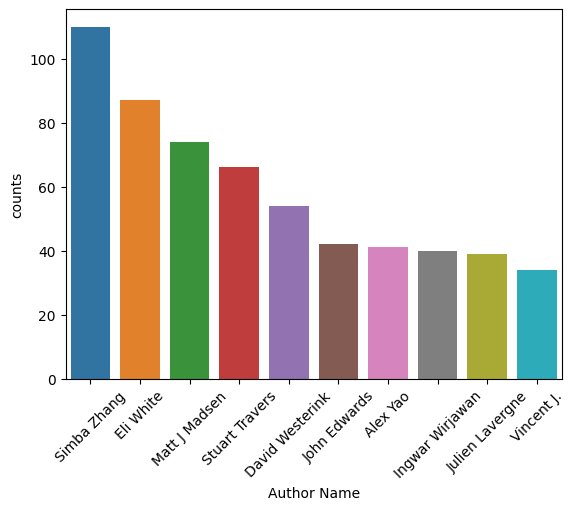

In [7]:
User= df.dropna(subset= ['Author Name'])

contributors_top10= User.groupby('Author Name').size().reset_index(name='counts').nlargest(10, 'counts')

sns.barplot(x='Author Name', y='counts', data= contributors_top10)
plt.xticks(rotation=45)

![](https://camo.githubusercontent.com/7da1222b4b7619475b570f567fe07eafa1618aecaada63b3a78332cec6c456ec/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f35323037313932372d63316364373130302d323536322d313165392d393038612d6464653931626131346535392e706e67)

### B.What is the frequency of commits?

In [8]:
# number of pull requests by year
df.groupby("Year").count()

,ID,Created,Closed,Time To Close (hours),Number of Changed Files,Title,Labels,Labels#,Is Merged,Base,Descriptions,Open/Closed,Author Name,Updated at,Commits,Month
Year,,,,,,,,,,,,,,,,
2016,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1968,1574,1968,1968,1968
2017,268,268,268,268,268,268,268,268,268,268,268,268,152,268,268,268
2018,9,9,9,9,9,9,9,9,9,9,9,9,8,9,9,9
2021,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2
2022,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
2023,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



    Thus, it can be seen that this project is most implemented in two years, 2016 and 2017. Therefore, we will analyze the frequency of commits by month of these 2 years.


In [9]:
df_2016= df[df['Year']== 2016]
df_2017= df[df['Year']== 2017]


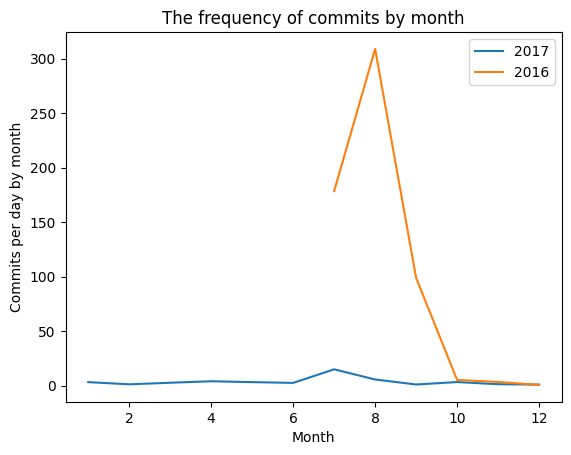

In [10]:
fre2016= df_2016.groupby('Month')['Commits'].sum()/30
fre2017= df_2017.groupby('Month')['Commits'].sum()/30

plt.plot(fre2017)
plt.plot(fre2016)
plt.xlabel("Month")
plt.ylabel("Commits per day by month")
plt.legend(["2017", "2016"])
plt.title("The frequency of commits by month")
plt.show()

![](https://camo.githubusercontent.com/7da1222b4b7619475b570f567fe07eafa1618aecaada63b3a78332cec6c456ec/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f35323037313932372d63316364373130302d323536322d313165392d393038612d6464653931626131346535392e706e67)

### C.Time of pull request

In [11]:
df['Time To Close (hours)'].describe()

count     2249.000000
mean        42.913104
std        491.581552
min          0.000833
25%          0.170833
50%          1.205833
75%          7.668611
max      13631.861111
Name: Time To Close (hours), dtype: float64

Text(0, 0.5, 'hours')

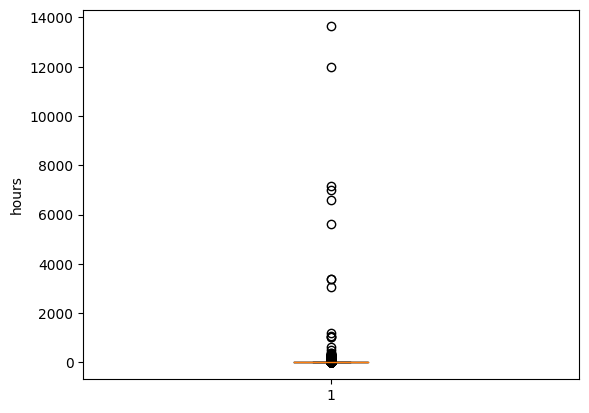

In [12]:
plt.boxplot(df['Time To Close (hours)'])
plt.ylabel("hours")

The average time to complete a pull request is 42 hours. However, there are some pull requests that have too long to close, which can affect the development of the project. In addition, in order to effectively analyze data, we can delete some data that is too different from the rest.

In [13]:
C= df.loc[df['Time To Close (hours)'] <= df['Time To Close (hours)'].quantile(0.95)]

Text(0, 0.5, 'hours')

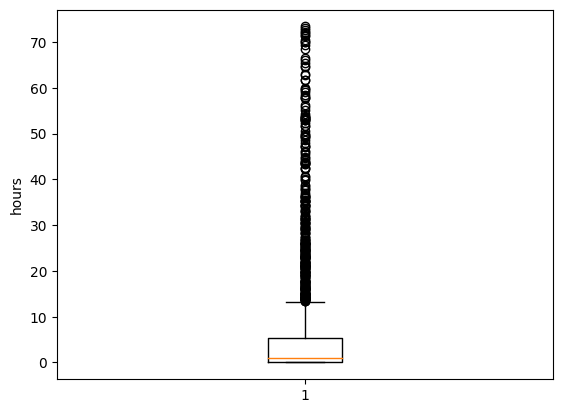

In [14]:
plt.boxplot(C['Time To Close (hours)'])
plt.ylabel("hours")

The above data cleaning process is to delete the largest 5% of data

![](https://camo.githubusercontent.com/7da1222b4b7619475b570f567fe07eafa1618aecaada63b3a78332cec6c456ec/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f35323037313932372d63316364373130302d323536322d313165392d393038612d6464653931626131346535392e706e67)

### D.Labels of PRs

The labels of a pull request are a preset list of identifiers that are expected to increase 
review time by creating a form of filtering. The labels of the pull requests on the different 
repositories showed a varying level of frequency and use. The labels and what that data shows in terms 
of pull request acceptance. From interviews with industry professionals is has been identified the 
labels are usually used, when they are used, as a tool to know which department or development 
group needs to review that pull request. The following table shows a table of the GitHub labels

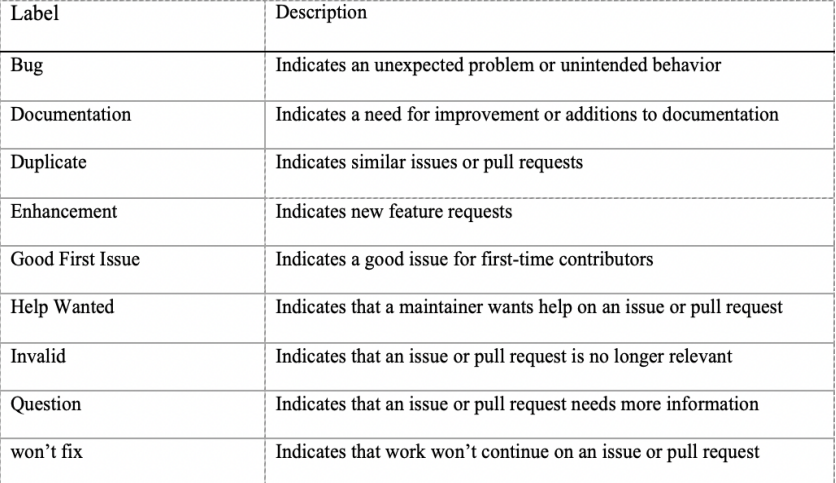

GitHub provides default labels in every new repository. You can use these default labels to help create a standard workflow in a repository.
Default labels are included in every new repository when the repository is created, but you can edit or delete the labels later.

In [28]:
def func(string):
    result = eval(string)
    return result


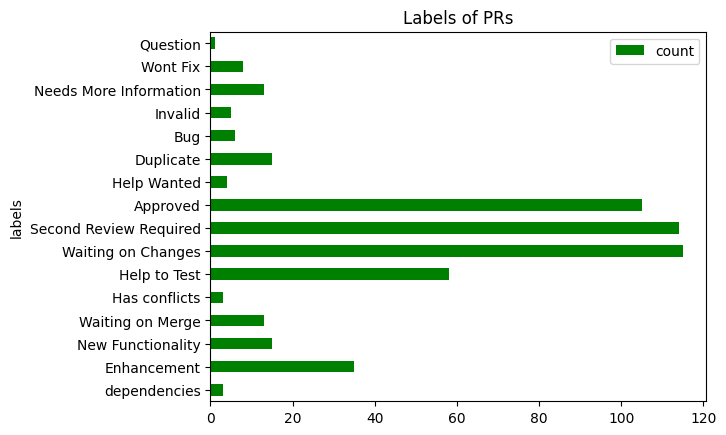

In [38]:
Labels= df[df['Labels']!='[]']

def f(dt, string):
    dict = {}
    for a in dt['Labels']:
        l= func(a)
        for i in l:
            if i in dict:
                dict[i] += 1
            else:
                dict[i]= 1

    df_labels= pd.DataFrame(dict.items(), columns= ['labels','count'])
    df_labels.plot.barh(x= 'labels', y= 'count', color= 'green', legend= True)
    plt.title(string)
    plt.show()
    
f(Labels,"Labels of PRs")

So in this repo 'Waiting on Changes','Second Review Required','Approved' are the three most used Labels

#### D1,The impact of different labels on the time to merge

In [33]:
La= df[df['Is Merged']== False]

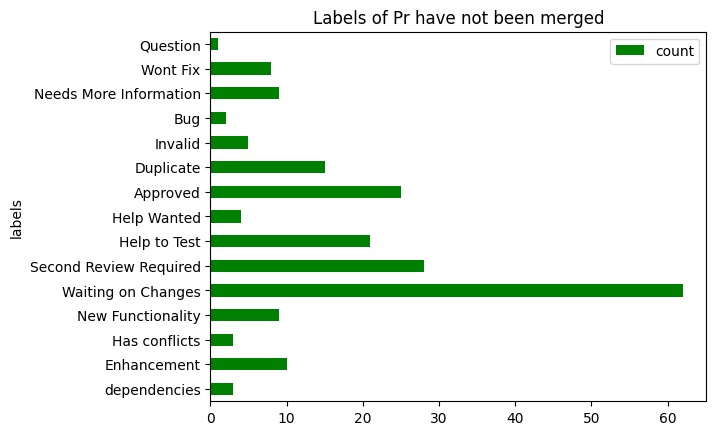

In [39]:
f(La,"Labels of Pr have not been merged")

Through Labels of PRs, we can see some problems of that PR that have not been merged. In which, "Waiting on Changes" accounts for the highest percentage

![](https://camo.githubusercontent.com/7da1222b4b7619475b570f567fe07eafa1618aecaada63b3a78332cec6c456ec/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f35323037313932372d63316364373130302d323536322d313165392d393038612d6464653931626131346535392e706e67)

### E.Commit Messages
What are the most common words in commit messages?

Text(0.5, 1.0, 'The most common words in commit messages')

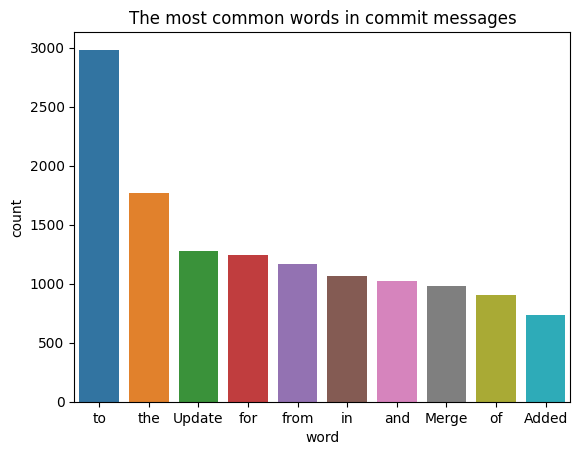

In [17]:
df_CM= pd.read_csv("CommitMessage.csv")
d= {}
for words in df_CM['Commit Message']:
    l = words.split()
    for i in l:
        if i in d:
            d[i] += 1
        else:
            d[i] = 1
            
CMdataframe= pd.DataFrame(d.items(), columns= ['word','count'])
CMdataframe= CMdataframe.sort_values(by = 'count', ascending= False)

s= CMdataframe['word']
top10= s.drop(s[~s.str.isalpha()].index).head(10)

cm= CMdataframe[CMdataframe['word'].isin(top10.values)]
sns.barplot(x= 'word', y= 'count', data= cm)
plt.title("The most common words in commit messages")

![](https://camo.githubusercontent.com/7da1222b4b7619475b570f567fe07eafa1618aecaada63b3a78332cec6c456ec/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f35323037313932372d63316364373130302d323536322d313165392d393038612d6464653931626131346535392e706e67)

### F.What files are most frequently changed?

In [18]:
df_files= pd.read_csv("FiledChanged.csv")
df_files= df_files.sort_values(by = 'Total Change', ascending= False)
df_files.head(10)



,Unnamed: 0,Total Change
0,data/pokemon.json,181897
395,map-chat/javascript/browserMqtt.js,55540
2,data/charged_moves.json,24211
3,data/fast_moves.json,20180
7,pokemongo_bot/__init__.py,18712
1007,pgoapi/protos/RpcSub_pb2.py,14286
1,configs/config.json.example,13841
37,pokemongo_bot/cell_workers/pokemon_catch_worke...,13127
40,pokemongo_bot/event_handlers/telegram_handler.py,12986
38,pokemongo_bot/cell_workers/pokemon_optimizer.py,12511


![](https://camo.githubusercontent.com/7da1222b4b7619475b570f567fe07eafa1618aecaada63b3a78332cec6c456ec/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f35323037313932372d63316364373130302d323536322d313165392d393038612d6464653931626131346535392e706e67)

### G.Since the data focuses on 2016, we will analyze more specifically that year

In [19]:
data2016= df[df['Year']== 2016]
data2016.head(1)

,ID,Created,Closed,Time To Close (hours),Number of Changed Files,Title,Labels,Labels#,Is Merged,Base,Descriptions,Open/Closed,Author Name,Updated at,Commits,Month,Year
282,5853,2016-12-30 07:07:51,2016-12-30 20:52:59,13.752222,10,"0.51, hashing service and gen2 pokemons support",[],0,False,dev,True,closed,P.,2016-12-30 20:54:10,7,12,2016


#### 1.'TotalPullRequests' by month

In [20]:
data2016.groupby("Month")['ID'].count()

Month
7     755
8     872
9     307
10     12
11     18
12      4
Name: ID, dtype: int64

#### 2.'Total Time to close' by month

In [21]:
x= data2016.groupby("Month")['Time To Close (hours)'].sum()

Text(0, 0.5, 'TotalTimeToClose (hours)')

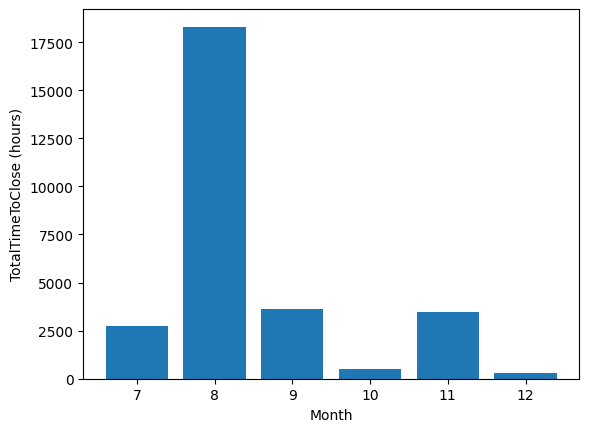

In [22]:
plt.bar(x.index, x.values)
plt.xlabel("Month")
plt.ylabel("TotalTimeToClose (hours)")

#### 2.1 Why does August have a much higher total time than the rest of the months?

In [23]:
data2016_August= data2016[data2016['Month']== 8]
data2016_August.shape

(872, 17)

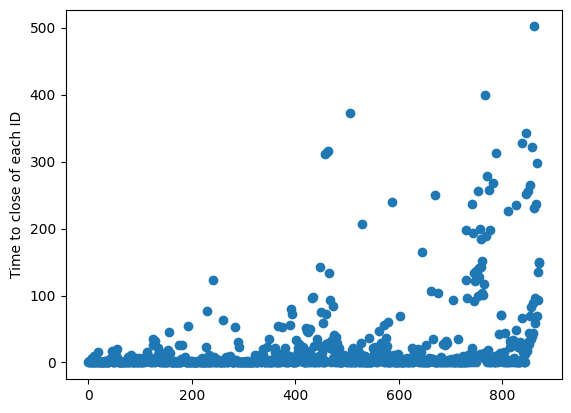

In [24]:
X= data2016_August["Time To Close (hours)"]
plt.scatter(range(0,len(X)), X)
plt.ylabel("Time to close of each ID")
plt.show()

In [25]:
data2016_August.describe()['Time To Close (hours)']

count    872.000000
mean      20.989524
std       56.398594
min        0.000833
25%        0.243542
50%        1.823333
75%       10.646111
max      501.726667
Name: Time To Close (hours), dtype: float64

In [26]:
print("Time To Close (hours) <100 : " ,len((data2016_August[data2016_August['Time To Close (hours)'] < 100])))

Time To Close (hours) <100 :  819


----------
From the above analysis we can have the following observations:

1, The percentage of time less than 100 h accounts for more than 90%

2, There are some IDs with quite large closed time

3.August is the month with the most pull requests compared to other months

Thus, the reason for the above question comes from 2 and 3

#### 3. "Average time to close" by month

In [27]:
data2016.groupby("Month")['Time To Close (hours)'].mean()

Month
7       3.638821
8      20.989524
9      11.786830
10     41.744028
11    191.575525
12     70.479653
Name: Time To Close (hours), dtype: float64

#### 4."Number of files changed" by month


In [28]:
data2016.groupby("Month")['Number of Changed Files'].sum()

Month
7     7383
8     5841
9     1569
10      68
11      69
12      19
Name: Number of Changed Files, dtype: int64

#### 5.'Merge' - Analysis

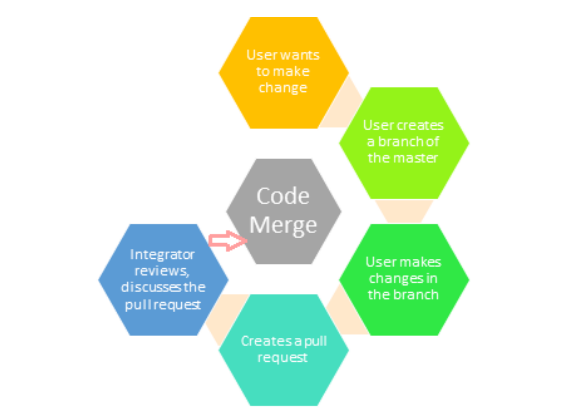

In [29]:
IsMerged= data2016.groupby("Month")['Is Merged'].sum()
Total= data2016.groupby("Month")['Is Merged'].count()

TimeMerge= data2016.groupby("Month")['Time To Close (hours)'].mean()



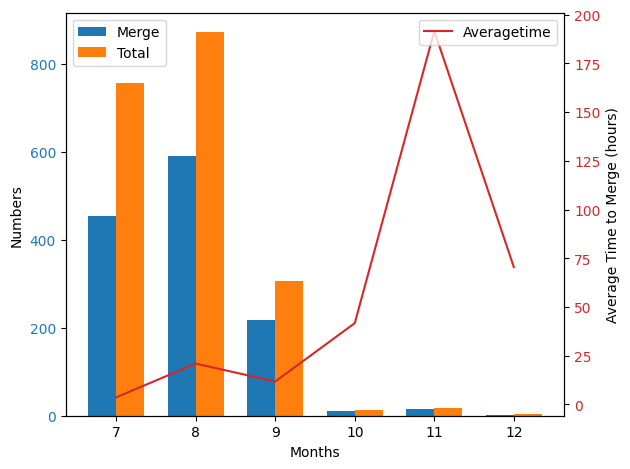

In [30]:
merge = IsMerged.values
total = Total.values
line = TimeMerge.values

x = np.arange(7,13)
width = 0.35

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Months')
ax1.set_ylabel('Numbers')
ax1.bar(x - width/2, merge, width, label='Merge')
ax1.bar(x + width/2, total, width, label='Total')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Average Time to Merge (hours)')
ax2.plot(x, line, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['Averagetime'],loc='upper right' )

fig.tight_layout()

plt.show()

In [31]:
arr = IsMerged.values / Total.values
arr= np.array(arr)

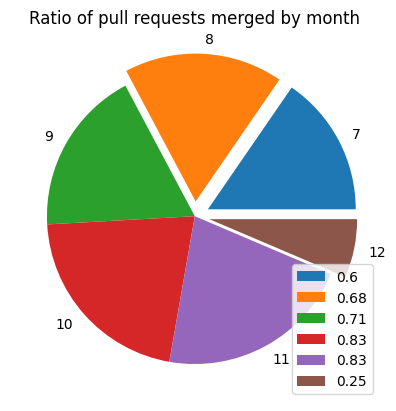

In [32]:
x= [7,8,9,10,11,12]
y = arr
myexplode = [0.1, 0.1, 0, 0, 0,0.1]
plt.pie(y, labels=x, explode=myexplode)
plt.title("Ratio of pull requests merged by month")
plt.legend(arr.round(2), loc='lower right')
plt.show()

Thus we can draw the following observations:

1, Months 7, 8, and 9 have a high number of pull requests and merges, in which August has the largest number and the merge rate is quite high at 68%, followed by July

2, The average merge time in the three months of July, August, and September is about 20 hours, much lower than the rest of the months.

3, So it can be seen that the development time of this project is more focused on the 3rd of July, August, and September 2016